In [1]:
import numpy as np
import pandas as pd 
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import seaborn as sns
from pathlib import Path
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [2]:
marine_debris = pd.read_csv("cleaned_merged_marine_debris_location_na_dropped .csv")

In [3]:
marine_debris

,id,itemname,material,quantity,radius,lat,long,location,time,year,month
0,27,Paper Bags,BOAT PARTS,10,1,38.76261902,-9.09568119,Portugal,20190523095353,2019,5
1,27,Paper Bags,BOAT PARTS,5,1,24.98070908,-77.4573288,The Bahamas,20190218151204,2019,2
2,27,Paper Bags,BOAT PARTS,3,1,-4.6211772,55.45106434,Seychelles,20190326135719,2019,3
3,27,Paper Bags,BOAT PARTS,3,1,-4.73951688,55.51597932,Seychelles,20190328082534,2019,3
4,27,Paper Bags,BOAT PARTS,3,1,-4.73951692,55.51597929,Seychelles,20190328082536,2019,3
...,...,...,...,...,...,...,...,...,...,...,...
11764,21,Flip-flops,RUBBER,4,1,-6.6780125,71.364869,British Indian Ocean Territory,20211026094426,2021,10
11765,21,Flip-flops,RUBBER,3,1,-6.6780572,71.3649403,British Indian Ocean Territory,20211026094540,2021,10
11766,21,Flip-flops,RUBBER,3,1,-6.6781015,71.3650014,British Indian Ocean Territory,20211026094614,2021,10
11767,21,Flip-flops,RUBBER,3,1,-6.678212,71.3651906,British Indian Ocean Territory,20211026094745,2021,10


In [4]:
marine_debris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11769 entries, 0 to 11768
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11769 non-null  object
 1   itemname  11769 non-null  object
 2   material  11769 non-null  object
 3   quantity  11769 non-null  object
 4   radius    11769 non-null  object
 5   lat       11769 non-null  object
 6   long      11769 non-null  object
 7   location  11769 non-null  object
 8   time      11769 non-null  object
 9   year      11769 non-null  object
 10  month     11769 non-null  object
dtypes: object(11)
memory usage: 1011.5+ KB


In [5]:
for x in marine_debris['radius'].unique():
    print(x)

1
5
2
10
6
4
9
12
24
3
25
19
8
7
54
222
115
90
43
30
97
60
17
20
18
quantity
13
100
29
11
37
65
15
40
16
229
118
51
48
331
21
14
73
22
33
50


In [6]:
removal = marine_debris[marine_debris['radius'].str.contains('quantity')]
marine_debris = marine_debris.drop(index=3157)

In [7]:
marine_debris.var()

Series([], dtype: float64)

In [8]:
marine_debris_1=marine_debris.drop(['id',"time","lat","long" ], axis=1)

In [9]:
marine_debris_1.isnull().values.any()

False

In [10]:
marine_debris_1.describe()

,itemname,material,quantity,radius,location,year,month
count,11768,11768,11768,11768,11768,11768,11768
unique,52,9,117,45,17,5,12
top,Foam Fragment,PLASTIC,3,1,British Indian Ocean Territory,2021,10
freq,2585,6073,6527,9723,7647,7878,3166


In [11]:
quantity=marine_debris_1["quantity"]
radius=marine_debris_1["radius"]

In [12]:
quantity

0        10
1         5
2         3
3         3
4         3
         ..
11764     4
11765     3
11766     3
11767     3
11768     3
Name: quantity, Length: 11768, dtype: object

In [13]:
radius

0        1
1        1
2        1
3        1
4        1
        ..
11764    1
11765    1
11766    1
11767    1
11768    1
Name: radius, Length: 11768, dtype: object

In [14]:
marine_debris_1

,itemname,material,quantity,radius,location,year,month
0,Paper Bags,BOAT PARTS,10,1,Portugal,2019,5
1,Paper Bags,BOAT PARTS,5,1,The Bahamas,2019,2
2,Paper Bags,BOAT PARTS,3,1,Seychelles,2019,3
3,Paper Bags,BOAT PARTS,3,1,Seychelles,2019,3
4,Paper Bags,BOAT PARTS,3,1,Seychelles,2019,3
...,...,...,...,...,...,...,...
11764,Flip-flops,RUBBER,4,1,British Indian Ocean Territory,2021,10
11765,Flip-flops,RUBBER,3,1,British Indian Ocean Territory,2021,10
11766,Flip-flops,RUBBER,3,1,British Indian Ocean Territory,2021,10
11767,Flip-flops,RUBBER,3,1,British Indian Ocean Territory,2021,10


In [15]:
marine_debris_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11768 entries, 0 to 11768
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   itemname  11768 non-null  object
 1   material  11768 non-null  object
 2   quantity  11768 non-null  object
 3   radius    11768 non-null  object
 4   location  11768 non-null  object
 5   year      11768 non-null  object
 6   month     11768 non-null  object
dtypes: object(7)
memory usage: 735.5+ KB


In [16]:
marine_debris_1_dummies = pd.get_dummies(marine_debris_1[["itemname","material","location"]])

In [17]:
marine_debris_1_dummies

,itemname_Aerosol cans,itemname_Aluminum or Tin Cans,itemname_Bait Containers,itemname_Balloon and/or String,itemname_Buoys and floats,itemname_Cigarettes/Cigars,itemname_Clothing and Shoes,itemname_Fabric pieces,itemname_Fishing Net,itemname_Fishing Traps,...,location_India,location_Mexico,location_Oconee County,location_Portugal,location_Seychelles,location_Spain,location_The Bahamas,location_Turkey,location_United States,location_Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
marine_debris_1_dummies['quantity'] = quantity

In [19]:
marine_debris_1_dummies['radius']=radius

In [20]:
marine_debris_1_dummies
marine_debris_1_dummies = marine_debris_1_dummies.astype(float)

In [21]:
marine_debris_1_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11768 entries, 0 to 11768
Data columns (total 80 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   itemname_Aerosol cans                     11768 non-null  float64
 1   itemname_Aluminum or Tin Cans             11768 non-null  float64
 2   itemname_Bait Containers                  11768 non-null  float64
 3   itemname_Balloon and/or String            11768 non-null  float64
 4   itemname_Buoys and floats                 11768 non-null  float64
 5   itemname_Cigarettes/Cigars                11768 non-null  float64
 6   itemname_Clothing and Shoes               11768 non-null  float64
 7   itemname_Fabric pieces                    11768 non-null  float64
 8   itemname_Fishing Net                      11768 non-null  float64
 9   itemname_Fishing Traps                    11768 non-null  float64
 10  itemname_Fishing lures and lines  

In [22]:
marine_debris_1_dummies['quantity'].astype('float64')
marine_debris_1_dummies['radius'].astype('float64')

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11764    1.0
11765    1.0
11766    1.0
11767    1.0
11768    1.0
Name: radius, Length: 11768, dtype: float64

In [23]:
print(marine_debris_1['itemname'].unique())
print("----------------------")
print(marine_debris_1['material'].unique())
print("----------------------")
print(marine_debris_1['location'].unique())

['Paper Bags' 'Buoys and floats' 'Non-Nylon Rope or Net'
 'Plastic Rope or Net' 'Fishing lures and lines' 'Fishing Net'
 'Lobster Claw Bands' 'Fishing Traps' 'Glass Fragments' 'Glass Bottle'
 'Light Bulbs or Tubes' 'Towels or rags' 'Fabric pieces'
 'Clothing and Shoes' 'Non-Rubber Gloves' 'Metal Fragments'
 'Metal Bottle Caps or Tabs' 'Aluminum or Tin Cans' 'Aerosol cans'
 'Plastic Film' 'Plastic Sheeting or Tarps' 'Other Plastic Packaging'
 'Bait Containers' 'Other Plastic' 'Foam or Plastic Food Containers'
 'Test Item' 'Other' 'Paper and Cardboard' 'Paper Food Wrappers'
 'Lumber/Building Materials' 'Pallets' 'Six-pack rings'
 'Tobacco Packaging or Lighters' 'Balloon and/or String' 'Plastic Bags'
 'Foam Fragment' 'Plastic or Foam Fragments' 'Cigarettes/Cigars'
 'Plastic Caps or Lids' 'Plastic Bottle' 'Rubber Fragments' 'Toys'
 'Straws' 'Plastic Utensils' 'Personal Care Products'
 'Plastic Food Wrappers' 'Foam or Plastic Cups or Plates'
 'Other Plastic Jugs' 'Rubber Gloves' 'Rubber Ban

In [24]:
X=marine_debris_1_dummies.drop(["quantity"], axis=1)
y=marine_debris_1_dummies["quantity"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

In [36]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)
training_score
testing_score

-2.0124019542262963e+21

In [37]:
training_score

0.234346797094396

Model: Linear Regression
Score: -2.0124019542262963e+21



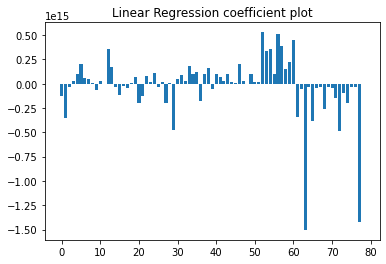

In [29]:
reg = LinearRegression().fit(X_train_scaled, y_train)
print('Model: Linear Regression')
print(f'Score: {reg.score(X_test_scaled, y_test)}\n')
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
plt.title(f'Linear Regression coefficient plot')
plt.show()  

In [53]:
# Fit a LASSO regression to the data
reg = Lasso().fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

0.21136783332204645

In [56]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(reg)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=Lasso())

In [57]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [58]:
reg = LinearRegression().fit(X_selected_train_scaled, y_train)
reg.score(X_selected_test_scaled, y_test)

0.2126955880483805

In [33]:
LR = LogisticRegression().fit(X_train_scaled, y_train)
y_pred = LR.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {LR.score(X_train_scaled, y_train)}')
print(f'Testing Score: {LR.score(X_test_scaled, y_test)}')

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.64      0.98      0.78      1651
         4.0       0.08      0.01      0.01       351
         5.0       0.78      0.47      0.59        89
         6.0       0.25      0.04      0.06       109
         7.0       0.00      0.00      0.00        62
         8.0       0.06      0.08      0.07        79
         9.0       0.11      0.06      0.08        52
        10.0       0.12      0.07      0.09        43
        11.0       0.09      0.23      0.13        44
        12.0       0.05      0.03      0.04        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.25      0.02      0.04        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labe

In [30]:
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.12      0.03      0.05        30
         2.0       0.50      1.00      0.67         1
         3.0       0.64      0.97      0.77      1651
         4.0       0.23      0.02      0.04       351
         5.0       0.76      0.47      0.58        89
         6.0       0.26      0.09      0.14       109
         7.0       0.00      0.00      0.00        62
         8.0       0.07      0.08      0.07        79
         9.0       0.06      0.08      0.06        52
        10.0       0.14      0.07      0.09        43
        11.0       0.08      0.14      0.10        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.20      0.04      0.06        53
        17.0       0.00    

In [45]:
model =  RandomForestRegressor()
model.fit(X_train_scaled, y_train)


RandomForestRegressor()

In [46]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)
testing_score

0.1524644640600552

In [48]:
training_score

0.5039898811440593

In [39]:
clf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.11      0.03      0.05        30
         2.0       0.50      1.00      0.67         1
         3.0       0.64      0.97      0.77      1651
         4.0       0.24      0.03      0.05       351
         5.0       0.76      0.47      0.58        89
         6.0       0.26      0.09      0.14       109
         7.0       0.00      0.00      0.00        62
         8.0       0.06      0.08      0.07        79
         9.0       0.05      0.08      0.06        52
        10.0       0.14      0.07      0.09        43
        11.0       0.09      0.14      0.11        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.18      0.04      0.06        53
        17.0       0.00    

In [50]:
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.53      0.74      0.62      1651
         4.0       0.00      0.00      0.00       351
         5.0       0.50      0.18      0.26        89
         6.0       0.00      0.00      0.00       109
         7.0       0.00      0.00      0.00        62
         8.0       0.00      0.00      0.00        79
         9.0       0.00      0.00      0.00        52
        10.0       0.00      0.00      0.00        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.00      0.00      0.00        53
        17.0       0.00    

In [55]:
def model_tester(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = model.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(classification_report(y_test, y_pred))
    print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    
model_tester(AdaBoostClassifier(random_state=1, n_estimators=100), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=200, learning_rate=0.1), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=500, learning_rate=0.1), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=1000, learning_rate=0.1), X, y)
model_tester(AdaBoostClassifier(random_state=1, n_estimators=2000, learning_rate=0.1), X, y)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.53      0.74      0.62      1651
         4.0       0.00      0.00      0.00       351
         5.0       0.50      0.18      0.26        89
         6.0       0.00      0.00      0.00       109
         7.0       0.00      0.00      0.00        62
         8.0       0.00      0.00      0.00        79
         9.0       0.00      0.00      0.00        52
        10.0       0.00      0.00      0.00        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.00      0.00      0.00        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.53      0.74      0.62      1651
         4.0       0.00      0.00      0.00       351
         5.0       0.50      0.18      0.26        89
         6.0       0.00      0.00      0.00       109
         7.0       0.00      0.00      0.00        62
         8.0       0.00      0.00      0.00        79
         9.0       0.00      0.00      0.00        52
        10.0       0.00      0.00      0.00        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.00      0.00      0.00        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.63      0.97      0.76      1651
         4.0       0.05      0.00      0.01       351
         5.0       0.68      0.40      0.51        89
         6.0       0.00      0.00      0.00       109
         7.0       0.10      0.27      0.15        62
         8.0       0.03      0.01      0.02        79
         9.0       0.05      0.04      0.04        52
        10.0       0.17      0.19      0.18        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.00      0.00      0.00        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.82      0.25      0.39      1651
         4.0       0.15      0.61      0.24       351
         5.0       0.29      0.40      0.34        89
         6.0       0.00      0.00      0.00       109
         7.0       0.08      0.35      0.14        62
         8.0       0.07      0.06      0.07        79
         9.0       0.08      0.02      0.03        52
        10.0       0.01      0.09      0.02        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.18      0.04      0.06        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.66      0.63      0.65      1651
         4.0       0.05      0.02      0.02       351
         5.0       0.71      0.42      0.52        89
         6.0       0.00      0.00      0.00       109
         7.0       0.08      0.34      0.13        62
         8.0       0.06      0.08      0.07        79
         9.0       0.11      0.08      0.09        52
        10.0       0.01      0.16      0.02        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.00      0.00      0.00        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00        30
         2.0       0.00      0.00      0.00         1
         3.0       0.74      0.53      0.62      1651
         4.0       0.07      0.06      0.07       351
         5.0       0.69      0.43      0.53        89
         6.0       0.03      0.01      0.01       109
         7.0       0.07      0.68      0.13        62
         8.0       0.07      0.01      0.02        79
         9.0       0.40      0.04      0.07        52
        10.0       0.03      0.09      0.04        43
        11.0       0.00      0.00      0.00        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.00      0.00      0.00        53
        17.0       0.00    

In [59]:
clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.5987990029458419
Testing Score: 0.5754588715159755


In [62]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.11      0.03      0.05        30
         2.0       0.33      1.00      0.50         1
         3.0       0.64      0.97      0.77      1651
         4.0       0.23      0.03      0.05       351
         5.0       0.76      0.47      0.58        89
         6.0       0.26      0.09      0.14       109
         7.0       0.00      0.00      0.00        62
         8.0       0.06      0.08      0.07        79
         9.0       0.05      0.08      0.06        52
        10.0       0.17      0.09      0.12        43
        11.0       0.09      0.14      0.11        44
        12.0       0.00      0.00      0.00        29
        13.0       0.00      0.00      0.00        33
        14.0       0.00      0.00      0.00        31
        15.0       0.00      0.00      0.00        27
        16.0       0.25      0.04      0.07        53
        17.0       0.00    

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellio\anaconda3\lib\site-packages\sklearn\metrics\_cla

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

### Bagging
Instead of having one decision tree, we make 50 random trees and average their output. Decision trees try to make the best decision possible at every point. So if we use the same input, we'll get the same decision tree each time. (And, we won't get a different answer after aggregating.) To get different trees, we give them different inputs by randomly sampling the input dataset. Random sampling with replacement is known as bootstrapping. (We use replacement because a data point might occur multiple times in the random sample.) This method of creating a random ensemble is known as bootstrap aggregating, or bagging.

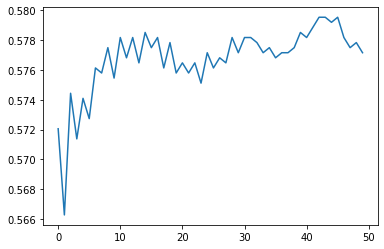

score: 0.5771583956492182


In [64]:
from sklearn.utils import resample

clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

We can go one step further by changing the behavior of the decision trees so that they randomly choose their splits. Counterintuitively, this can increase the accuracy of the model, even though we make each tree worse on its own.

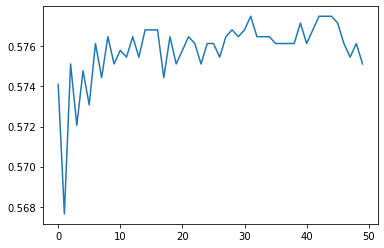

score: 0.5751189666893269


In [65]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a random decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(splitter='random', random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

## Boosting

Boosting is another ensemble method that creates many weak learners (classifiers or regressors that do slightly better than chance). Boosting uses their predictions in aggregate to create one accurate prediction. However, unlike Bagging methods, each new weak learner is trained on data that skews the training dataset to data points that the previous weak learners didn't estimate well.

In [70]:
from boost_helper_functions import bootstrap, get_estimator_weight, new_sample_weights

n_estimators = 50

estimator_weights = np.zeros(n_estimators)
estimators = [DecisionTreeClassifier(max_depth=2) for i in range(n_estimators)]

sample_weights = np.ones(len(X_train_scaled)) / len(X_train_scaled)
for i in range(50):
    estimator = estimators[i]
    
    # Fit the estimator to a bootstrapped sample
    X_bootstrap, y_bootstrap = bootstrap(X_train_scaled, y_train, sample_weights, random_state=1)
    estimator.fit(X_bootstrap, y_bootstrap)
    
    # Calculate the amount that each sample contributes to the total error
    y_predict = estimator.predict(X_train_scaled)
    errors = np.abs(y_predict - y_train)
    normalized_errors = errors / np.abs(y_predict - y_train).max()
        
    # Calculate how much say this estimator should have in the final prediction
    estimator_weights[i] = get_estimator_weight(sample_weights, normalized_errors)
    
    # Calculate which samples the next estimator should focus on more
    sample_weights = new_sample_weights(sample_weights, normalized_errors)
    
y_preds = [reg.predict(X_test_scaled) for reg in estimators]
y_pred = pd.DataFrame(y_preds).median().round()
print(classification_report(y_test, y_pred))

ModuleNotFoundError: No module named 'boost_helper_functions'

In [26]:
scaled_df = StandardScaler().fit_transform(marine_debris_1_dummies)
pca = PCA(n_components=0.9)
marine_debris_pca = pca.fit_transform(scaled_df)


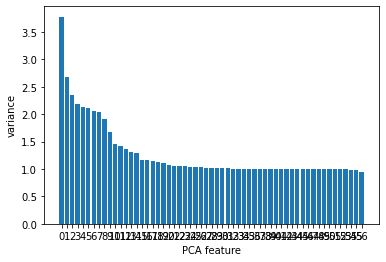

In [27]:
pipeline=make_pipeline(scaler,pca)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [28]:
marine_debris_pca.shape


(11768, 57)

In [29]:
pca.explained_variance_ratio_.sum()

0.9110386352827853

In [30]:
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler

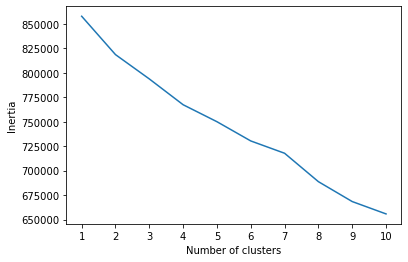

In [31]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(marine_debris_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
# Initializing model with K = 7 (since we now already know there are seven classes for marine debris)
model = KMeans(n_clusters=7, random_state=5)

In [33]:
# Fitting model
model.fit(marine_debris_pca)

KMeans(n_clusters=7, random_state=5)

In [34]:
# Get predictions
predictions = model.predict(marine_debris_pca)
print(predictions)


[6 6 6 ... 4 4 4]


In [35]:
# Initialize t-SNE model
#number between 10 and 1000, you will get differente results
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


tsne = TSNE(learning_rate=35)

In [36]:
# Reduce dimensions
tsne_features = tsne.fit_transform(marine_debris_pca)

C:\Users\ellio\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [37]:
# Prepare to plot the dataset

# The first column of transformed features
New_df= pd.DataFrame()

New_df['x'] = tsne_features[:,0]

# The second column of transformed features
New_df['y'] = tsne_features[:,1]

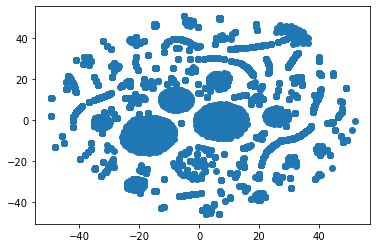

In [38]:
# Visualize the clusters
plt.scatter(New_df['x'], New_df['y'])
plt.show()

In [39]:
New_df

,x,y
0,2.758447,11.054111
1,2.762451,11.052063
2,2.758318,11.055578
3,2.758318,11.055578
4,2.758318,11.055578
...,...,...
11763,3.413881,20.181198
11764,0.871748,2.105001
11765,0.637992,2.111495
11766,0.058611,2.402978


In [40]:
predictions = model.predict(marine_debris_pca)
print(predictions)

[6 6 6 ... 4 4 4]


In [41]:
class_pred = pd.DataFrame(predictions)

In [42]:
New_df['class']=class_pred

In [43]:
New_df

,x,y,class
0,2.758447,11.054111,6
1,2.762451,11.052063,6
2,2.758318,11.055578,6
3,2.758318,11.055578,6
4,2.758318,11.055578,6
...,...,...,...
11763,3.413881,20.181198,4
11764,0.871748,2.105001,4
11765,0.637992,2.111495,4
11766,0.058611,2.402978,4


In [44]:
model.labels_


array([6, 6, 6, ..., 4, 4, 4])

In [46]:
labels=New_df['class']

In [48]:
labels.value_counts()

3    6385
5    2933
4    1689
0     464
2     232
1      45
6      20
Name: class, dtype: int64

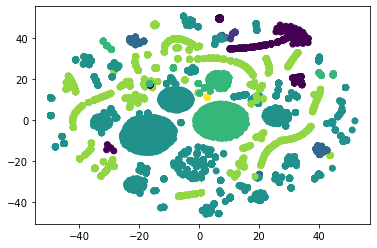

In [51]:
# Visualize the clusters with color
plt.scatter(New_df['x'], New_df['y'], c=labels)
plt.show()

The visual details how there are 7 different clusters. This conveys that in the 7 different oceans there can be varying degrees of marine debris. The highest having 6385 points, second highest being 2933, and third highest being 1689. Overall, our oceans are being impacted heavily by human waste (production of boat parts, cloth/clothing, fishing equipment, glass,metals, paper & lumber, plastic, and rubber). Consumption of these items needs to be reduced  and this is something that needs to be a priority of concern.
